# Clustering con K-means

In [15]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

## Preparando los datos

In [2]:
# Preparamos los datos
X,y,c = make_blobs(500, cluster_std= 0.8, centers=4, n_features=2, return_centers=True)

# Creamos el dataset
df = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)
df

,x1,x2,y
0,5.228102,-5.775260,1
1,6.581700,-7.337113,1
2,0.064875,6.179858,0
3,5.038719,-6.497161,1
4,-0.243174,3.056111,0
...,...,...,...
495,5.893485,-5.971186,1
496,3.634497,-7.913002,2
497,3.895617,-9.048921,2
498,-3.857486,-2.293107,3


In [3]:
# Creamos otro dataset con los centroides
df_c = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1]
    }
)
df_c

,x1,x2
0,-0.651031,4.484782
1,5.679599,-6.034815
2,3.984577,-8.380561
3,-4.907911,-3.512292


## Graficamos los datos

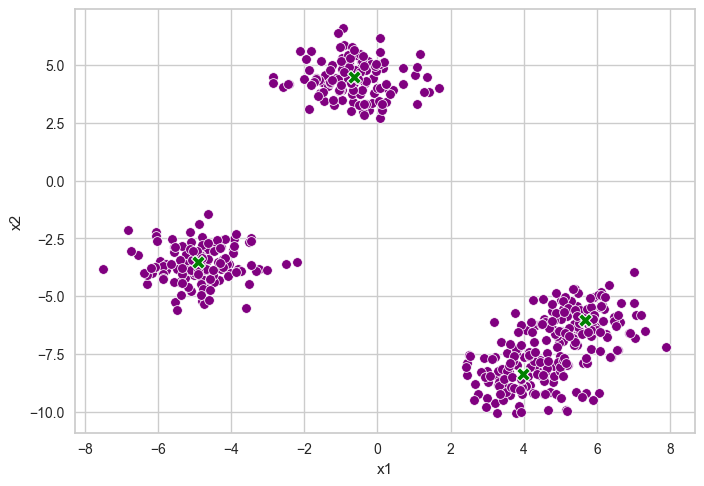

In [4]:
# Visualizamos los datos
sns.scatterplot(data=df, x='x1', y='x2', color='purple')
sns.scatterplot(data=df_c, x='x1', y='x2', color='green', marker='X', s=100);

## Implementando K-means

In [5]:
kmeans = KMeans(n_clusters=4) # Creamos el modelo
df_cluster = kmeans.fit_predict(X) # Entrenamos y predecimos
df['cluster'] = df_cluster # Añadimos la columna cluster al dataset
k_means_centers = kmeans.cluster_centers_ # Obtenemos los centroides
df_kmeans_centers = pd.DataFrame(
    {
        'x1': k_means_centers[:,0],
        'x2': k_means_centers[:,1]
    }
)

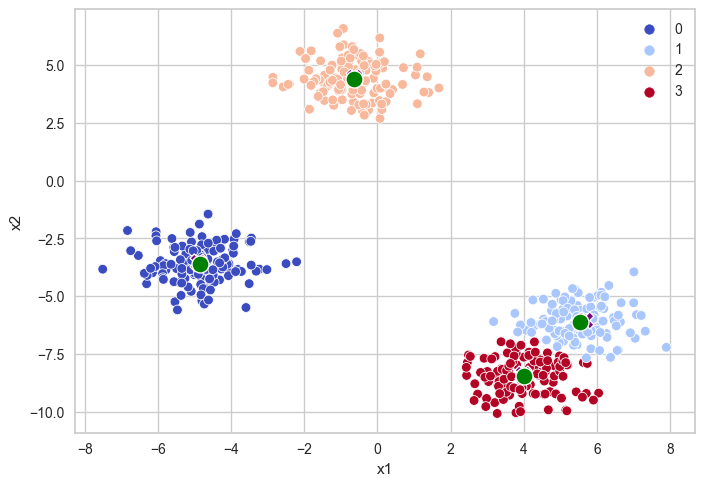

In [6]:
# Visualizamos los datos
sns.scatterplot(data=df, x='x1', y='x2', hue='cluster', palette='coolwarm')
sns.scatterplot(data=df_c, x='x1', y='x2', color='purple', marker='X', s=150)
sns.scatterplot(data=df_kmeans_centers, x='x1', y='x2', color='green', marker='o', s=150);

## Encontrando K

In [7]:
%run "Funciones Auxiliares/Funciones_auxiliares.ipynb"

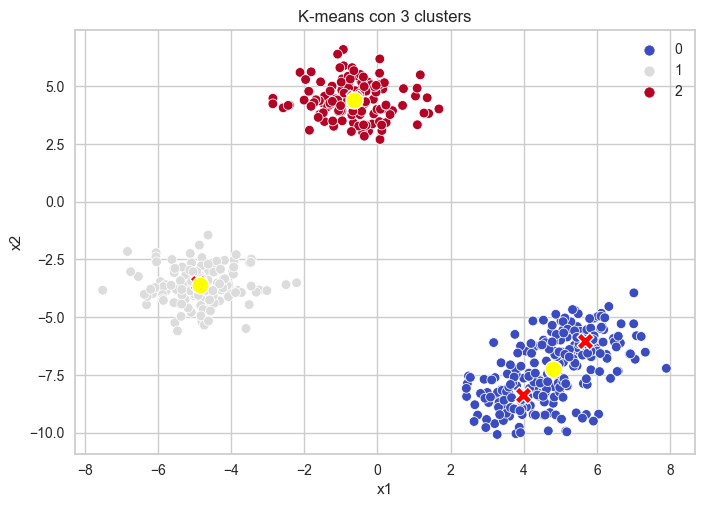

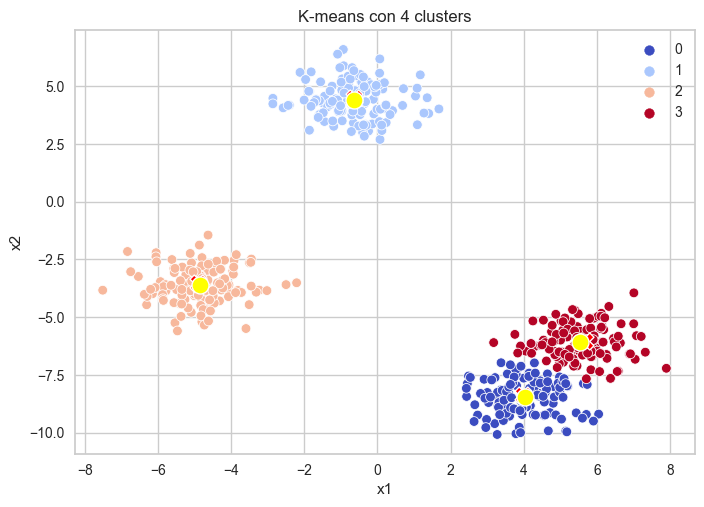

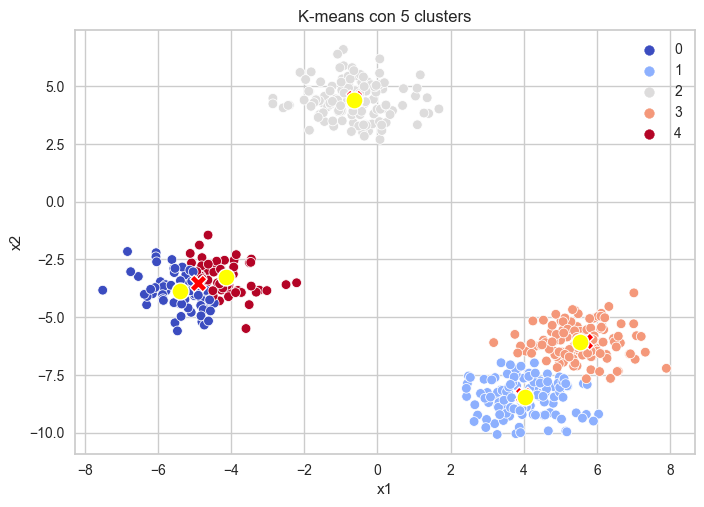

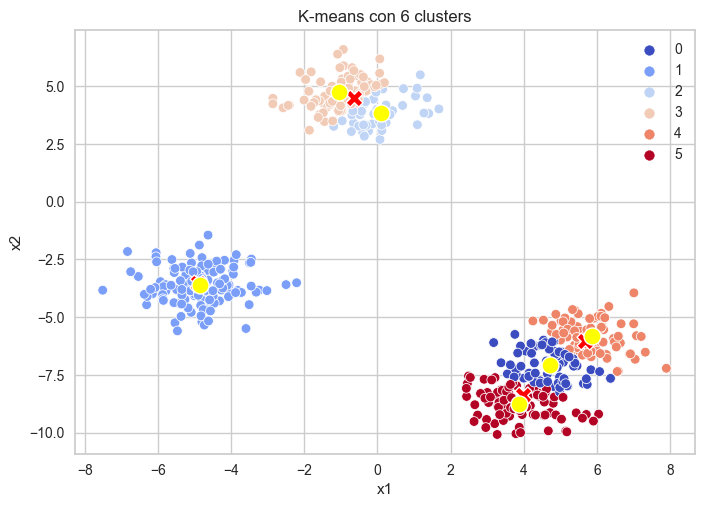

In [8]:
for _ in range(3, 7):
    vis_cluster(_)

### Método del codo

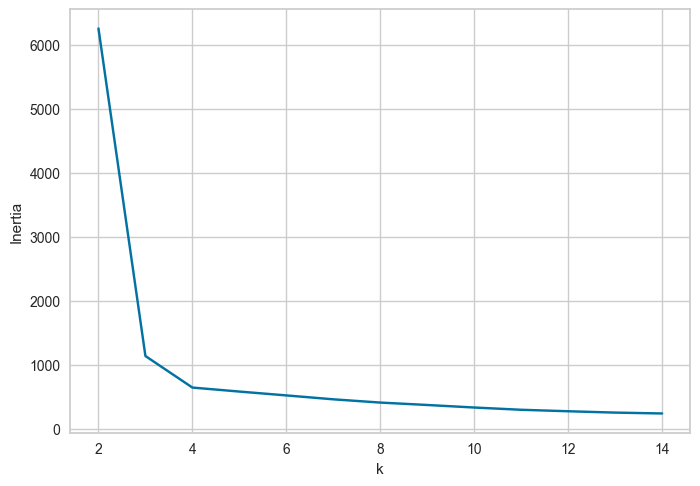

In [9]:
sum_of_squared_distances = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia');

### Método de la silueta

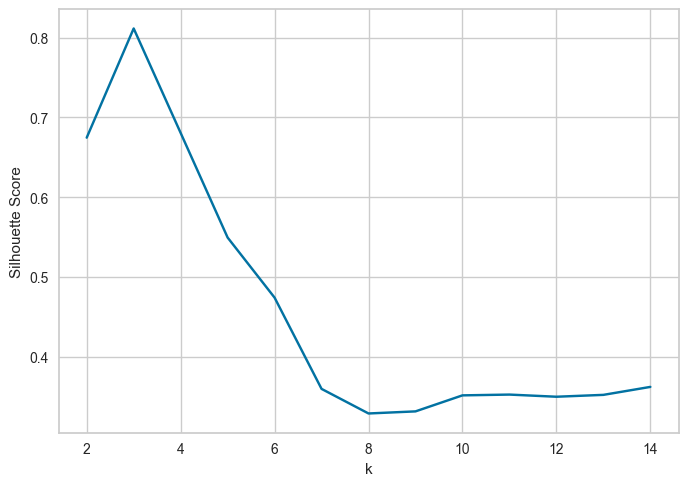

In [10]:
silhouette_scores =[]
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X, y))

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

# Evaluando resultados de K-means

SilhouetteVisualizer(ax=<AxesSubplot: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

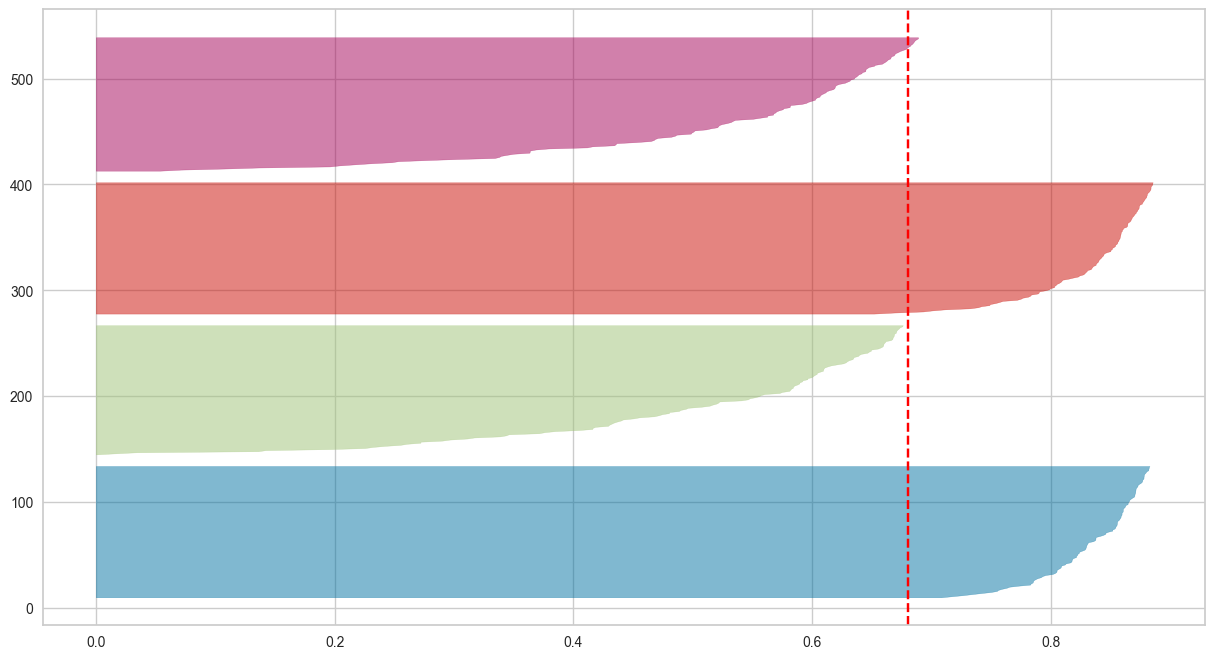

In [16]:
# Visualizamos los datos con el K calculado
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)

In [13]:
# graficamos las siluetas
km = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km, X, colors='yellowbrick')
visualizer.fit(X)
visualizer.show();

NameError: name 'SilhouetteVisualizer' is not defined